# Dinosaur Fossil Recorde Insights

## 1.	Introduction
### Problem Statement
This project is based on a competition I participated in through DataCamp. The problem statement was as follows: Imagine you're applying for a summer internship at a national museum of natural history. The museum has recently created a database containing all dinosaur records from past field campaigns. Your task is to explore these fossil records to uncover interesting insights and advise the museum on the quality of the data.

In this project, I utilized Python libraries such as Pandas and Numpy to handle missing data, create visualizations, identify trends over time, and extract meaningful insights from the provided dataset. The analysis aimed to answer key questions posed by the competition, such as:
### Questions
1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Create an interactive map showing each record.
6. Any other insights you found during your analysis?

By addressing these questions, the project sought to enhance the museum's understanding of its fossil collection and provide recommendations for data quality improvement.


## 2. Data
The dataset containing dinosaur records was collected from the Paleobiology Database ([source](https://paleobiodb.org/#/)). The following table gives a brief description of the columns and key variables.


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

### 2.1. Initial Data Exploration

In [2]:
# Import the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [4]:
import folium
from folium.plugins import MarkerCluster

In [64]:
# Load the data
dinosaurs = pd.read_csv('dinosaurs.csv')
# Preview the dataframe
dinosaurs

occurrence_no               name         diet              type  \
0            130294  Protarchaeopteryx   omnivorous    small theropod   
1            130295        Caudipteryx   omnivorous    small theropod   
2            139242        Gorgosaurus  carnivorous    large theropod   
3            139250        Gorgosaurus  carnivorous    large theropod   
4            139252        Gorgosaurus  carnivorous    large theropod   
...             ...                ...          ...               ...   
4946        1360627      Isaberrysaura          NaN               NaN   
4947        1363632        Stegosaurus  herbivorous  armored dinosaur   
4948        1363633     Othnielosaurus          NaN               NaN   
4949        1364695          Iguanodon  herbivorous        ornithopod   
4950        1365108         Luluichnus          NaN               NaN   

      length_m  max_ma  min_ma             region         lng        lat  \
0          2.0   130.0  122.46           Liaoning  120.733330  41.799999   
1          1.0   130.0  122.46           Liaoning  120.733330  41.799999   
2          8.6    83.5   70.60            Alberta -111.528732  50.740726   
3          8.6    83.5   70.60            Alberta -111.549347  50.737015   
4          8.6    83.5   70.60            Alberta -111.564636  50.723866   
...        ...     ...     ...                ...         ...        ...   
4946       NaN   171.6  168.40            Neuquén  -70.263290 -39.205288   
4947       9.0   157.3  152.10            Wyoming -107.816666  44.650002   
4948       NaN   157.3  152.10            Wyoming -107.816666  44.650002   
4949      10.0   145.0  139.80      Niedersachsen    9.959357  52.341167   
4950       NaN   139.8  125.00  Western Australia  122.142029 -17.489502   

             class             family  
0       Saurischia  Archaeopterygidae  
1       Saurischia    Caudipterygidae  
2       Saurischia    Tyrannosauridae  
3       Saurischia    Tyrannosauridae  
4       Saurischia    Tyrannosauridae  
...            ...                ...  
4946  Ornithischia                NaN  
4947  Ornithischia      Stegosauridae  
4948  Ornithischia                NaN  
4949  Ornithischia                NaN  
4950  Ornithischia                NaN  

[4951 rows x 12 columns]

Look into each column data type and overview of numerical columns:

In [6]:
print(dinosaurs.info())
dinosaurs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB
None


occurrence_no     length_m       max_ma       min_ma          lng  \
count   4.951000e+03  3568.000000  4951.000000  4951.000000  4951.000000   
mean    6.838323e+05     8.212688   117.518477   106.622270   -37.048675   
std     3.021524e+05     6.629887    45.270821    44.395885    84.591106   
min     1.302090e+05     0.450000    70.600000    66.000000  -153.247498   
25%     4.871225e+05     3.000000    83.500000    70.600000  -108.258705   
50%     5.618050e+05     6.700000    99.600000    89.800000   -96.099998   
75%     8.675665e+05    10.000000   155.700000   145.000000    27.383331   
max     1.365954e+06    35.000000   252.170000   247.200000   565.000000   

               lat  
count  4951.000000  
mean     34.591448  
std      23.961138  
min     -84.333336  
25%      36.274439  
50%      42.611198  
75%      47.745138  
max      78.101875

In [7]:
# Select only the columns with dtype 'object'
object_columns = dinosaurs.select_dtypes(include='object')

# Loop through each object column and print unique values
for column in object_columns.columns:
    print(f"Unique values in column '{column}':")
    print(dinosaurs[column].unique())
    print("\n" + "="*40 + "\n")  # For better readability


Unique values in column 'name':
['Protarchaeopteryx' 'Caudipteryx' 'Gorgosaurus' ... 'Elrhazosaurus'
 'Isaberrysaura' 'Luluichnus']


Unique values in column 'diet':
['omnivorous' 'carnivorous' 'herbivorous' nan]


Unique values in column 'type':
['small theropod' 'large theropod' 'sauropod' nan 'ornithopod'
 'ceratopsian' 'armored dinosaur']


Unique values in column 'region':
['Liaoning' 'Alberta' 'Maharashtra' 'Chubut' 'Colorado' 'New Mexico'
 'Arizona' 'Omnogov' 'Wyoming' 'Baden-Württemberg' 'Free State' 'Neuquén'
 'Matabeleland North' 'Andhra Pradesh' 'Aargau' 'Sachsen-Anhalt' 'Montana'
 'Utah' 'Texas' 'Oklahoma' 'New Jersey' 'Saône-et-Loire' 'Sichuan'
 'San Juan' 'Madhya Pradesh' 'England' 'Yunnan' 'Al Jizah' 'Matruh'
 'Illizi' 'Adrar' 'Tataouine' 'Agadez' 'Yafran' 'Tahoua'
 'Rio Grande do Sul' 'Er Rachida' 'Istarska Zupanija' nan 'Wales'
 'Nei Mongol' 'Hunedoara' 'Pernambuco' 'Ceará' 'Maryland'
 'Basse-Normandie' "Provence-Alpes-Côte d'Azur" 'Bouches-du-Rhône'
 'Río Negro' 'Quee

### 2.2 Missing Data
Find number of NULL values for each colums:

In [8]:
print(dinosaurs.isnull().sum())

occurrence_no       0
name                0
diet             1355
type             1355
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64


In [9]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


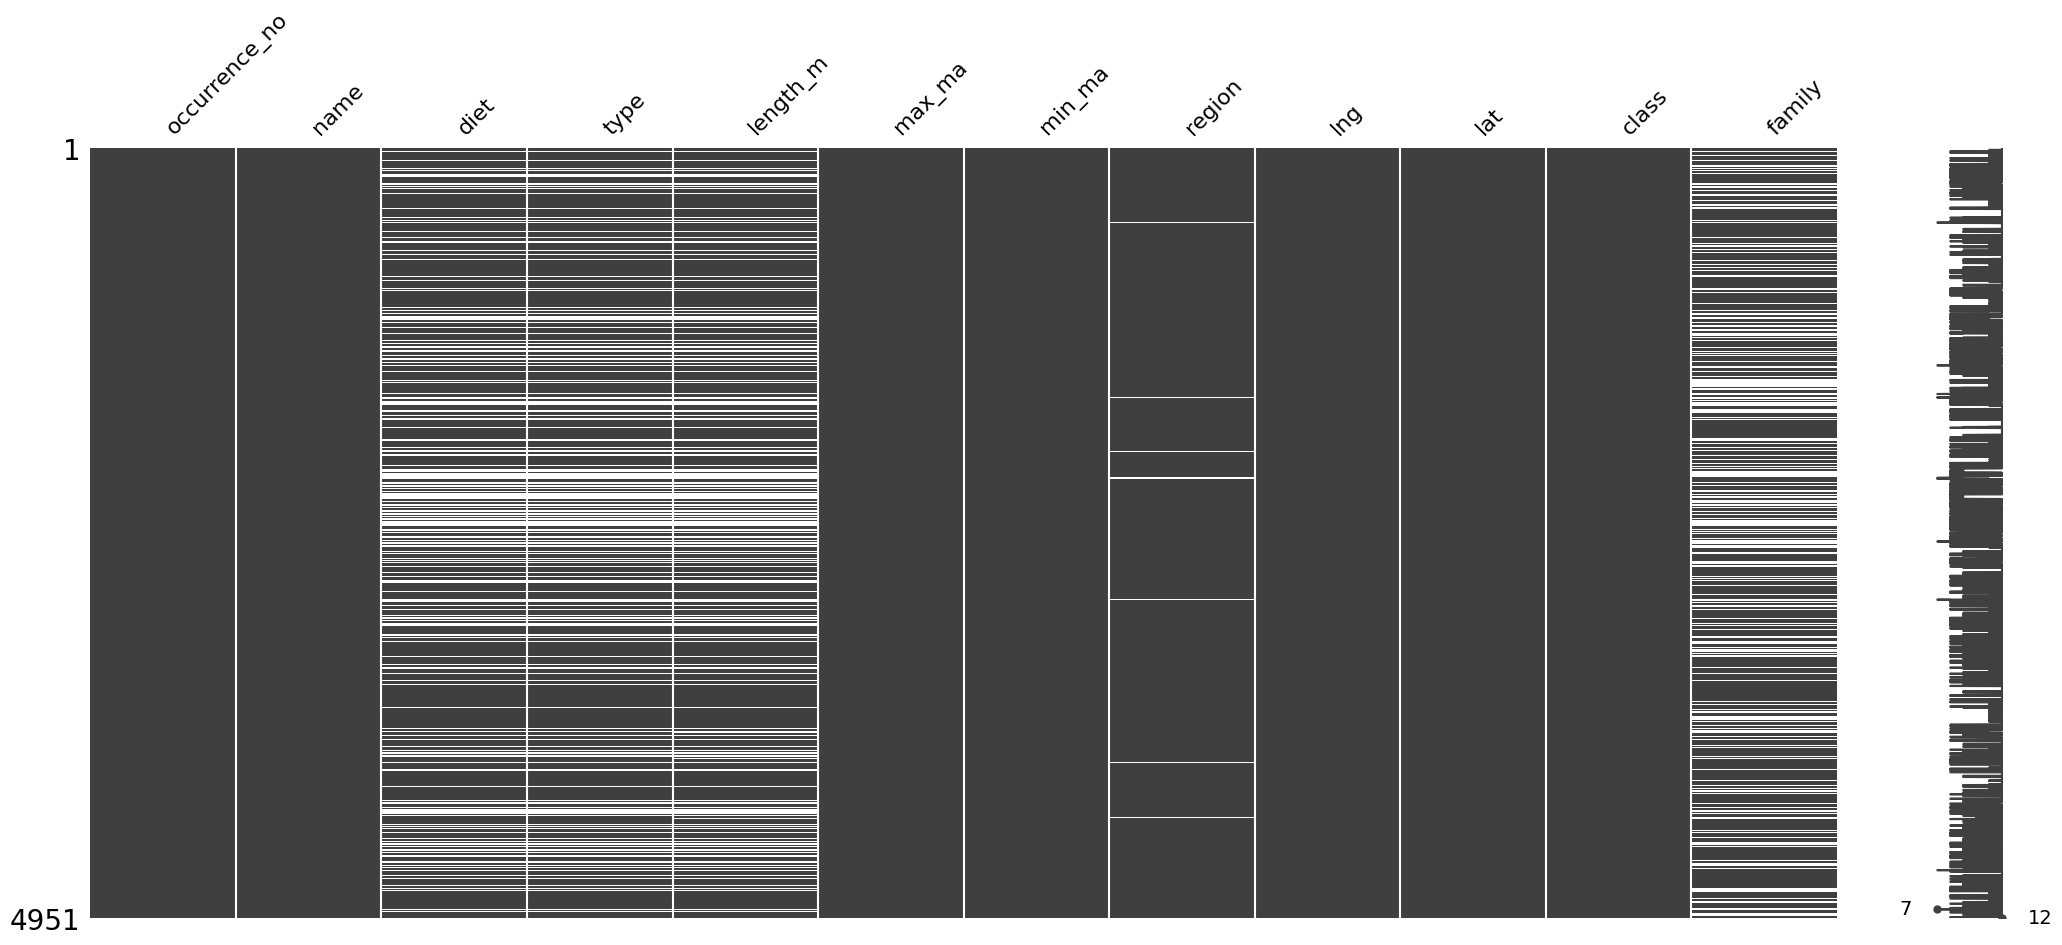

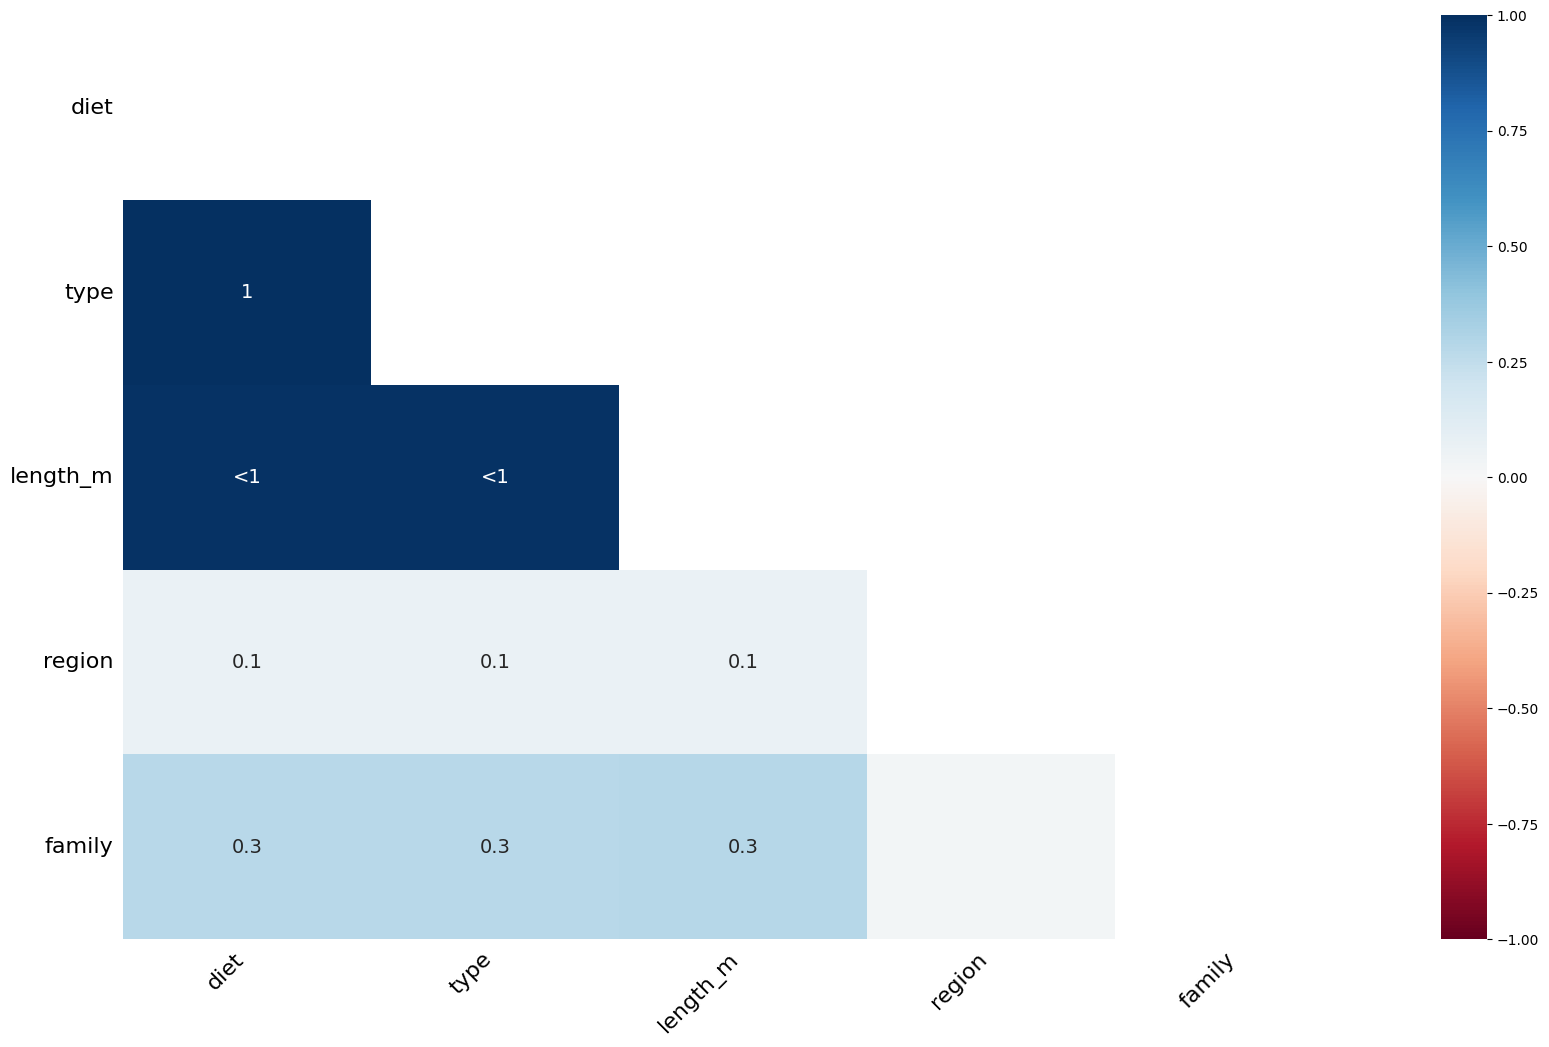

In [10]:
import missingno as msno

# Visualize missing data as a matrix
msno.matrix(dinosaurs)
plt.show()

# Visualize correlations in missing data
msno.heatmap(dinosaurs)
plt.show()

In [11]:
diet_class_table = pd.crosstab(dinosaurs['class'], dinosaurs['diet'])
print(diet_class_table)

diet          carnivorous  herbivorous  omnivorous
class                                             
Ornithischia            0         1481           0
Saurischia           1308          595         212


We know that all Ornithischia dinosaurs are herbivorous

In [68]:
# Fill missing diet values with "herbivorous" where the class is "Ornithischia"
dinosaurs.loc[(dinosaurs['diet'].isna()) & (dinosaurs['class'] == 'Ornithischia'), 'diet'] = 'herbivorous'

In [70]:
# Group by 'family' and count the number of unique 'type' values for each family
family_to_name = dinosaurs.groupby('name')['family'].nunique()

# Identify families associated with more than one type
inconsistent_families2 = family_to_name[family_to_name > 1]

In [74]:
# Group by 'family' and count the number of unique 'type' values for each family
type_to_name = dinosaurs.groupby('name')['type'].nunique()

# Identify families associated with more than one type
inconsistent_families3 = family_to_name[type_to_name > 1]

In [78]:
# Group by 'family' and count the number of unique 'type' values for each family
family_to_type = dinosaurs.groupby('family')['type'].nunique()

# Identify families associated with more than one type
inconsistent_families = family_to_type[family_to_type > 1]

In [79]:
inconsistent_families

family
Dromaeosauridae    2
Herrerasauridae    2
Ornithomimidae     2
Troodontidae       2
Name: type, dtype: int64

In [96]:
# List of families to exclude from the fill operation
excluded_families = ["Dromaeosauridae", "Herrerasauridae", "Ornithomimidae", "Troodontidae"]

# Create a mapping of 'family' to 'type' where 'type' is not null and 'family' is not in the excluded list
family_to_type = dinosaurs[~dinosaurs['family'].isin(excluded_families) & dinosaurs['type'].notna()].set_index('family')['type'].to_dict()

# Identify rows where 'type' is NaN, 'family' is not null, and 'family' is not in the excluded list
condition = dinosaurs['type'].isna() & dinosaurs['family'].notna() & ~dinosaurs['family'].isin(excluded_families)

# Use the family-to-type dictionary to fill in the missing 'type' values
dinosaurs.loc[condition, 'type'] = dinosaurs.loc[condition, 'family'].map(family_to_type)

# Fill missing values in the 'type' column with "small/large theropod" where 'family' is in excluded_families
dinosaurs.loc[(dinosaurs['family'].isin(excluded_families)) & (dinosaurs['type'].isna()), 'type'] = "small/large theropod"

In [97]:
dinosaurs.isna().sum()

occurrence_no       0
name                0
diet              959
type              828
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

In [98]:
dinosaurs[(dinosaurs['type'].isna())& dinosaurs['family'].isin(excluded_families)]

Empty DataFrame
Columns: [occurrence_no, name, diet, type, length_m, max_ma, min_ma, region, lng, lat, class, family]
Index: []

In [99]:
# Group by 'family' and count the number of unique 'type' values for each family
family_to_diet = dinosaurs.groupby('family')['diet'].nunique()

# Identify families associated with more than one type
inconsistent_families5 = family_to_diet[family_to_diet > 1]

In [100]:
inconsistent_families5

family
Massospondylidae     2
Ornithomimidae       2
Oviraptoridae        2
Therizinosauridae    3
Name: diet, dtype: int64

In [101]:
# List of families to exclude from the fill operation
excluded_diet_families = ["Massospondylidae", "Ornithomimidae", "Oviraptoridae", "Therizinosauridae"]

# Create a mapping of 'family' to 'type' where 'type' is not null and 'family' is not in the excluded list
family_to_diet = dinosaurs[~dinosaurs['family'].isin(excluded_families) & dinosaurs['diet'].notna()].set_index('family')['diet'].to_dict()

# Identify rows where 'type' is NaN, 'family' is not null, and 'family' is not in the excluded list
condition = dinosaurs['diet'].isna() & dinosaurs['family'].notna() & ~dinosaurs['family'].isin(excluded_families)

# Use the family-to-type dictionary to fill in the missing 'type' values
dinosaurs.loc[condition, 'diet'] = dinosaurs.loc[condition, 'family'].map(family_to_diet)

In [102]:
dinosaurs.isnull().sum()

occurrence_no       0
name                0
diet              730
type              828
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

In [12]:
type_class_table = pd.crosstab(dinosaurs['class'], dinosaurs['type'])
print(type_class_table)

type          armored dinosaur  ceratopsian  large theropod  ornithopod  \
class                                                                     
Ornithischia               307          363               1         810   
Saurischia                   0            0             732           1   

type          sauropod  small theropod  
class                                   
Ornithischia         0               0  
Saurischia         665             717  


In [13]:
dinosaurs[(dinosaurs['class']=='Ornithischia') & (dinosaurs['type']=='large theropod')]

occurrence_no         name         diet            type  length_m  \
3085         149987  Goyocephale  herbivorous  large theropod       2.0   

      max_ma  min_ma   region         lng        lat         class family  
3085    86.3    66.0  Omnogov  102.066666  48.583332  Ornithischia    NaN

In [14]:
dinosaurs[(dinosaurs['name']=='Goyocephale')]

occurrence_no         name         diet            type  length_m  \
3085         149987  Goyocephale  herbivorous  large theropod       2.0   

      max_ma  min_ma   region         lng        lat         class family  
3085    86.3    66.0  Omnogov  102.066666  48.583332  Ornithischia    NaN

In [15]:
dinosaurs[(dinosaurs['class']=='Saurischia') & (dinosaurs['type']=='ornithopod')]

occurrence_no        name         diet        type  length_m  max_ma  \
145         284027  Pantydraco  herbivorous  ornithopod       3.0   208.5   

     min_ma region       lng        lat       class family  
145   201.3  Wales -3.373889  51.459999  Saurischia    NaN

In [48]:
dinosaurs[(dinosaurs['name']=='Pantydraco')]

occurrence_no        name         diet        type  length_m  max_ma  \
145         284027  Pantydraco  herbivorous  ornithopod       3.0   208.5   

     min_ma region       lng        lat       class family  mid_ma  
145   201.3  Wales -3.373889  51.459999  Saurischia   NULL   204.9

In [17]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


Check to ensure there are not duplicated records:

In [18]:
print(dinosaurs.duplicated().sum())

0


In [58]:
x = dinosaurs[(dinosaurs['family']=='Dromaeosauridae')]
x.groupby('type').nunique()

occurrence_no  name  diet  length_m  max_ma  min_ma  region  \
type                                                                          
NULL                       48    23     1         0      11      10      22   
large theropod              3     2     1         2       3       3       2   
small theropod            399    11     1         9      19      16      35   

                lng  lat  class  family  mid_ma  
type                                             
NULL             40   39      1       1      15  
large theropod    3    3      1       1       3  
small theropod  238  233      1       1      27

In [90]:
x = dinosaurs[(dinosaurs['family']=='Dromaeosauridae')&(dinosaurs['type']=='large theropod')]
x 

occurrence_no          name         diet            type  length_m  \
146          284147    Utahraptor  carnivorous  large theropod       6.0   
147          284613    Utahraptor  carnivorous  large theropod       6.0   
1391         537891  Achillobator  carnivorous  large theropod       5.0   

      max_ma  min_ma    region         lng        lat       class  \
146   129.40  125.00      Utah -109.567902  38.826099  Saurischia   
147   125.45  122.46      Utah -109.691666  38.718056  Saurischia   
1391  100.50   83.60  Dornogov  109.858887  44.340000  Saurischia   

               family  
146   Dromaeosauridae  
147   Dromaeosauridae  
1391  Dromaeosauridae

In [57]:
x = dinosaurs[(dinosaurs['family']=='Herrerasauridae')]
x.groupby('type').nunique()

occurrence_no  name  diet  length_m  max_ma  min_ma  region  \
type                                                                          
NULL                        3     2     1         0       2       3       3   
large theropod              1     1     1         1       1       1       1   
small theropod             18     2     1         2       3       4       4   

                lng  lat  class  family  mid_ma  
type                                             
NULL              3    3      1       1       3  
large theropod    1    1      1       1       1  
small theropod   12   12      1       1       5

In [59]:
x = dinosaurs[(dinosaurs['family']=='Ornithomimidae')]
x.groupby('type').nunique()

occurrence_no  name  diet  length_m  max_ma  min_ma  region  \
type                                                                          
NULL                        4     4     1         0       4       4       4   
large theropod             65     3     2         3       8       5      14   
small theropod              4     1     1         1       2       3       3   

                lng  lat  class  family  mid_ma  
type                                             
NULL              4    4      1       1       4  
large theropod   58   62      1       1      10  
small theropod    4    4      1       1       3

In [60]:
x = dinosaurs[(dinosaurs['family']=='Troodontidae')]
x.groupby('type').nunique()

occurrence_no  name  diet  length_m  max_ma  min_ma  region  \
type                                                                          
NULL                       26    15     1         0       9       9      11   
large theropod             99     1     1         1      10       8      15   
small theropod            120     5     1         4       8       6      13   

                lng  lat  class  family  mid_ma  
type                                             
NULL             21   21      1       1      13  
large theropod   85   83      1       1      10  
small theropod  111  106      1       1      10

In [66]:
dinosaurs[dinosaurs['type'].isnull()]

occurrence_no            name diet type  length_m  max_ma  min_ma  \
22           144307  Bistahieversor  NaN  NaN       NaN    83.5    70.6   
23           148500    Sonorasaurus  NaN  NaN       NaN   105.3    93.5   
30           149988        Efraasia  NaN  NaN       NaN   228.0   208.5   
65           247238   Sauroposeidon  NaN  NaN       NaN   125.0   100.5   
75           255936      Sphingopus  NaN  NaN       NaN   247.2   237.0   
...             ...             ...  ...  ...       ...     ...     ...   
4939        1350009   Elrhazosaurus  NaN  NaN       NaN   125.0   113.0   
4945        1358696  Othnielosaurus  NaN  NaN       NaN   157.3   145.0   
4946        1360627   Isaberrysaura  NaN  NaN       NaN   171.6   168.4   
4948        1363633  Othnielosaurus  NaN  NaN       NaN   157.3   152.1   
4950        1365108      Luluichnus  NaN  NaN       NaN   139.8   125.0   

                 region         lng        lat         class  \
22           New Mexico -107.966393  36.060280    Saurischia   
23              Arizona -110.418053  31.811390    Saurischia   
30    Baden-Württemberg    8.978333  49.023609    Saurischia   
65             Oklahoma  -96.099998  34.400002    Saurischia   
75       Saône-et-Loire    4.432778  46.841946    Saurischia   
...                 ...         ...        ...           ...   
4939             Agadez    9.471944  16.849722  Ornithischia   
4945           Colorado -108.995796  39.238300  Ornithischia   
4946            Neuquén  -70.263290 -39.205288  Ornithischia   
4948            Wyoming -107.816666  44.650002  Ornithischia   
4950  Western Australia  122.142029 -17.489502  Ornithischia   

                  family  
22                   NaN  
23       Brachiosauridae  
30                   NaN  
65                   NaN  
75    Parachirotheriidae  
...                  ...  
4939        Dryosauridae  
4945                 NaN  
4946                 NaN  
4948                 NaN  
4950                 NaN  

[1355 rows x 12 columns]

In [23]:
dinosaurs.nunique()

occurrence_no    4951
name             1042
diet                3
type                6
length_m           71
max_ma             57
min_ma             57
region            287
lng              2472
lat              2423
class               2
family             75
dtype: int64

Filling the Region missing values based on it's longitude and latitude

In [24]:
def fill_region(row, df):
    if pd.isnull(row['region']):
        lat = row['lat']
        lng = row['lng']
        
        # Filter rows where lat and lng are within ±1, and 'region' is not null
        matching_rows = df[(np.abs(df['lat'] - lat) <= 5) & 
                           (np.abs(df['lng'] - lng) <= 5) & 
                           df['region'].notnull()]
        
        if not matching_rows.empty:
            # Calculate distances between the current row and matching rows
            matching_rows['distance'] = np.sqrt((matching_rows['lat'] - lat)**2 + 
                                                (matching_rows['lng'] - lng)**2)
            
            # Get the row with the minimum distance
            closest_row = matching_rows.loc[matching_rows['distance'].idxmin()]
            
            # Return the region from the closest row
            return closest_row['region']
    
    return row['region']

# Apply the function to each row in the dataset using 'axis=1' for row-wise application
dinosaurs['region'] = dinosaurs.apply(lambda row: fill_region(row, dinosaurs), axis=1)


In [25]:
region_missing = dinosaurs[dinosaurs['region'].isnull()]
print (region_missing)

      occurrence_no             name         diet            type  length_m  \
142          283828     Plateosaurus  herbivorous        sauropod       7.0   
143          283860     Plateosaurus  herbivorous        sauropod       7.0   
631          475133  Cryolophosaurus  carnivorous  large theropod       8.0   
632          475135   Glacialisaurus          NaN             NaN       NaN   
1602         567919   Satapliasaurus          NaN             NaN       NaN   
1708         604143     Plateosaurus  herbivorous        sauropod       7.0   
2528        1081677      Spinosaurus  carnivorous  large theropod      18.0   
2529        1081681     Titanosaurus          NaN             NaN       NaN   
3402         474488    Antarctopelta          NaN             NaN       NaN   
4275         645889        Iguanodon  herbivorous      ornithopod      10.0   
4642        1095295       Trinisaura          NaN             NaN       NaN   
4894        1311096      Morrosaurus          NaN   

In [26]:
type_missing = dinosaurs[dinosaurs['type'].isnull()]
type_missing.info()
type_missing.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
Index: 1355 entries, 22 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  1355 non-null   int64  
 1   name           1355 non-null   object 
 2   diet           0 non-null      object 
 3   type           0 non-null      object 
 4   length_m       0 non-null      float64
 5   max_ma         1355 non-null   float64
 6   min_ma         1355 non-null   float64
 7   region         1349 non-null   object 
 8   lng            1355 non-null   float64
 9   lat            1355 non-null   float64
 10  class          1355 non-null   object 
 11  family         680 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 137.6+ KB


name diet type   region       class           family
count           1355    0    0     1349        1355              680
unique           741    0    0      211           2               71
top     Titanosaurus  NaN  NaN  Alberta  Saurischia  Dromaeosauridae
freq              35  NaN  NaN       68         959               48

In [27]:
# Replace missing values in the specified categorical columns with 'NULL'
columns_to_fill = ['diet', 'type', 'region', 'family']

# Using fillna() to replace NaN values with 'NULL'
dinosaurs[columns_to_fill] = dinosaurs[columns_to_fill].fillna('NULL')

### 2.3 Check for Duplicated Rows

In [28]:
dinosaurs.duplicated().sum()

np.int64(0)

In [29]:
dinosaurs.isnull().sum()

occurrence_no       0
name                0
diet                0
type                0
length_m         1383
max_ma              0
min_ma              0
region              0
lng                 0
lat                 0
class               0
family              0
dtype: int64

### 2.4 Unique Values

In [30]:
dinosaurs.nunique()

occurrence_no    4951
name             1042
diet                4
type                7
length_m           71
max_ma             57
min_ma             57
region            288
lng              2472
lat              2423
class               2
family             76
dtype: int64

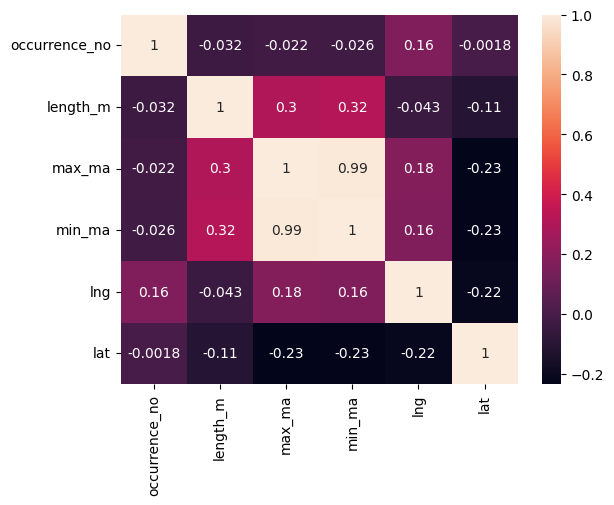

In [31]:
numerical_cols = dinosaurs.select_dtypes(include='number')
sns.heatmap(numerical_cols.corr(),  annot= True)
plt.show()

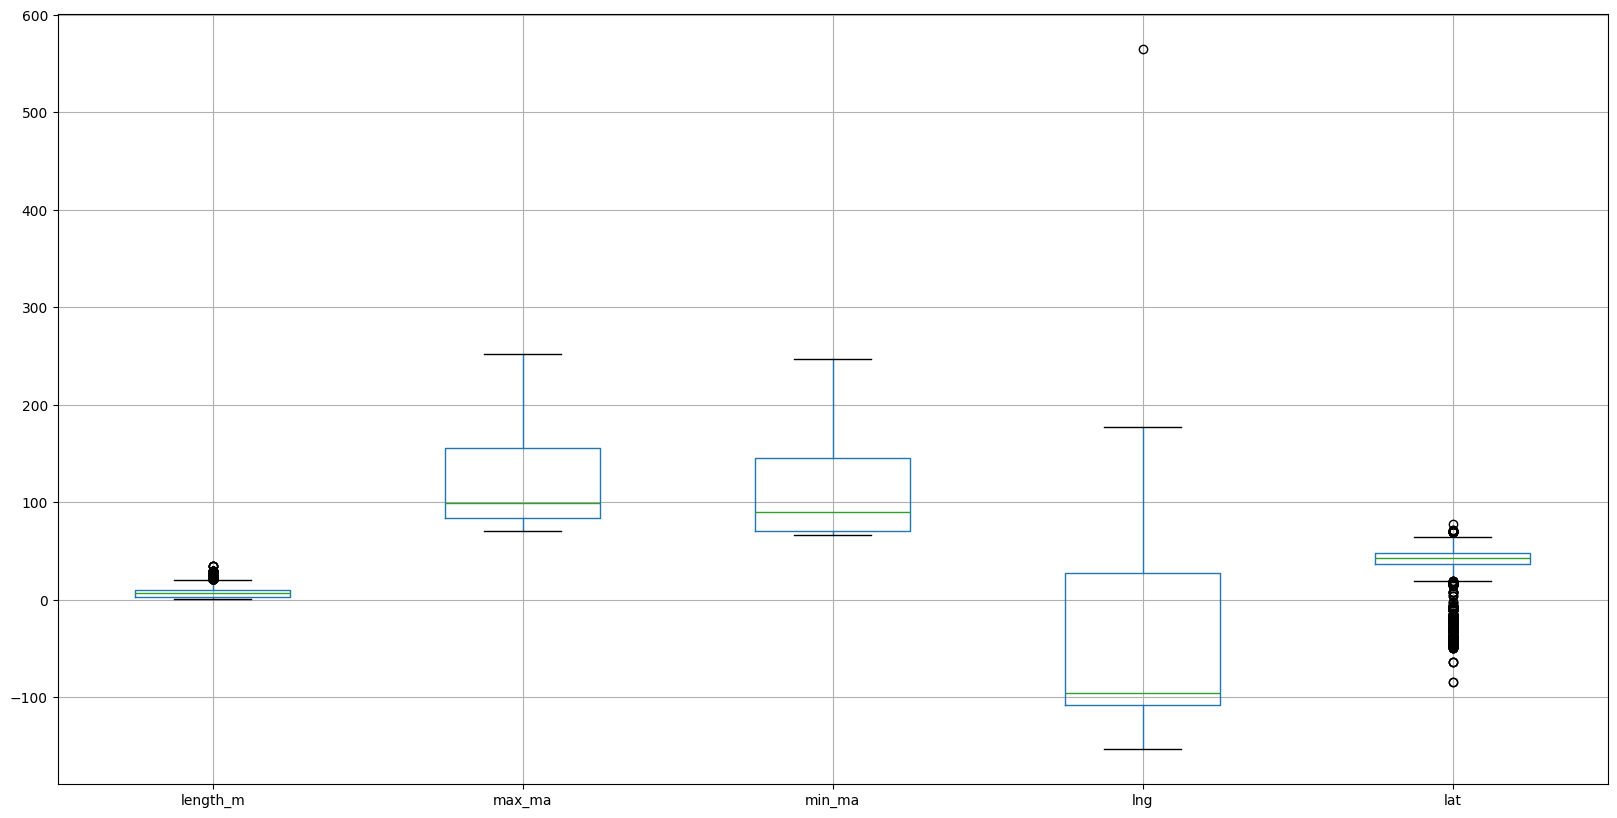

In [32]:

dinosaurs.drop(columns='occurrence_no').boxplot(figsize=(20,10))
plt.show()

**All Ornithischias in the database are herbivorous**

In [33]:
diet_class_table = pd.crosstab(dinosaurs['class'], dinosaurs['diet'])
print(diet_class_table)

diet          NULL  carnivorous  herbivorous  omnivorous
class                                                   
Ornithischia   396            0         1481           0
Saurischia     959         1308          595         212


**investigate the following anomolies**

In [34]:
e=dinosaurs[(dinosaurs['type']=='large theropod') & (dinosaurs['class']=='Ornithischia')]
print(e)

      occurrence_no         name         diet            type  length_m  \
3085         149987  Goyocephale  herbivorous  large theropod       2.0   

      max_ma  min_ma   region         lng        lat         class family  
3085    86.3    66.0  Omnogov  102.066666  48.583332  Ornithischia   NULL  


In [35]:
type_diet_table = pd.crosstab(dinosaurs['type'], dinosaurs['diet'])
print(type_diet_table)

diet              NULL  carnivorous  herbivorous  omnivorous
type                                                        
NULL              1355            0            0           0
armored dinosaur     0            0          307           0
ceratopsian          0            0          363           0
large theropod       0          659            3          71
ornithopod           0            0          811           0
sauropod             0            0          589          76
small theropod       0          649            3          65


In [36]:
type_family_table = pd.crosstab(dinosaurs['type'], dinosaurs['family'])
print(type_family_table)

family            Abelisauridae  Allosauridae  Alvarezsauridae  Anchisauridae  \
type                                                                            
NULL                         16             0                6              3   
armored dinosaur              0             0                0              0   
ceratopsian                   0             0                0              0   
large theropod               29           104                0              0   
ornithopod                    0             0                0              0   
sauropod                      0             0                0              3   
small theropod                0             0                1              0   

family            Anchisauripodidae  Ankylosauridae  Anomoepodidae  \
type                                                                 
NULL                              5              30             15   
armored dinosaur                  0              78         

In [37]:
mean_stats = dinosaurs.groupby('type').agg({
    'length_m': 'mean',
    'max_ma': 'mean',
    'min_ma': 'mean',
    'lat': 'mean',
    'lng': 'mean'
})
mean_stats

length_m      max_ma      min_ma        lat        lng
type                                                                     
NULL                    NaN  129.430221  117.617011  25.146509  -7.985919
armored dinosaur   6.284488  122.497166  111.719870  38.900469 -40.509524
ceratopsian        5.692676   87.700964   76.186997  45.558391 -42.144088
large theropod     8.860383  108.114352   98.430764  38.354331 -40.131276
ornithopod         7.135634  101.552145   90.966473  42.639086 -57.706264
sauropod          17.842169  157.156301  146.945233  25.290870 -25.497955
small theropod     1.893543   98.882008   87.754240  40.719871 -72.106274

## 3. Methodology

## 4. Results
### 4.1. Dinosaurs Diversity within Our Dataset

**This dataset contains 4,951 records and 1,042 unique dinosaur names that are present in the data**

In [38]:
print(dinosaurs['name'].value_counts())

name
Richardoestesia      151
Saurornitholestes    136
Triceratops          125
Iguanodon            111
Troodon              111
                    ... 
Ziapelta               1
Plesiohadros           1
Sonorasaurus           1
Amygdalodon            1
Protarchaeopteryx      1
Name: count, Length: 1042, dtype: int64


### 4.2. Identify The Largest Dinosaurs
From the DESCRIBE function we know that the max length of a dinosaur in this record is 35.0 meters. 

**The Supersaurus and Argentinosaurus from Sauropod dinosaur type are the largest dinosaurs with 35 meters length.
There are 1383 rows missing length data value which is about 28% of all of records.**

In [39]:
largest_dinosaurs = dinosaurs[dinosaurs['length_m'] ==35.0]
print(largest_dinosaurs)

      occurrence_no             name         diet      type  length_m  max_ma  \
570          465134      Supersaurus  herbivorous  sauropod      35.0   155.7   
924          489575      Supersaurus  herbivorous  sauropod      35.0   155.7   
1165         513500  Argentinosaurus  herbivorous  sauropod      35.0    99.6   
1423         541209      Supersaurus  herbivorous  sauropod      35.0   157.3   
1972         693186      Supersaurus  herbivorous  sauropod      35.0   157.3   

      min_ma       region         lng        lat       class        family  
570    145.0     Colorado -108.397202  38.583099  Saurischia  Diplodocidae  
924    145.0  Estremadura   -9.343696  39.216393  Saurischia  Diplodocidae  
1165    89.8      Neuquén  -69.059998 -38.916672  Saurischia          NULL  
1423   145.0     Colorado -109.036133  39.200081  Saurischia  Diplodocidae  
1972   145.0      Wyoming -105.439041  42.629375  Saurischia  Diplodocidae  


### 4.3. Dinosaurs with Most Frequency

**Based on the bar plot shown below Ornithopod type with 811 records has the most occurrences in this dataset**

In [40]:
print(dinosaurs['type'].value_counts())

type
NULL                1355
ornithopod           811
large theropod       733
small theropod       717
sauropod             665
ceratopsian          363
armored dinosaur     307
Name: count, dtype: int64


Bar plot per dinosaur type:

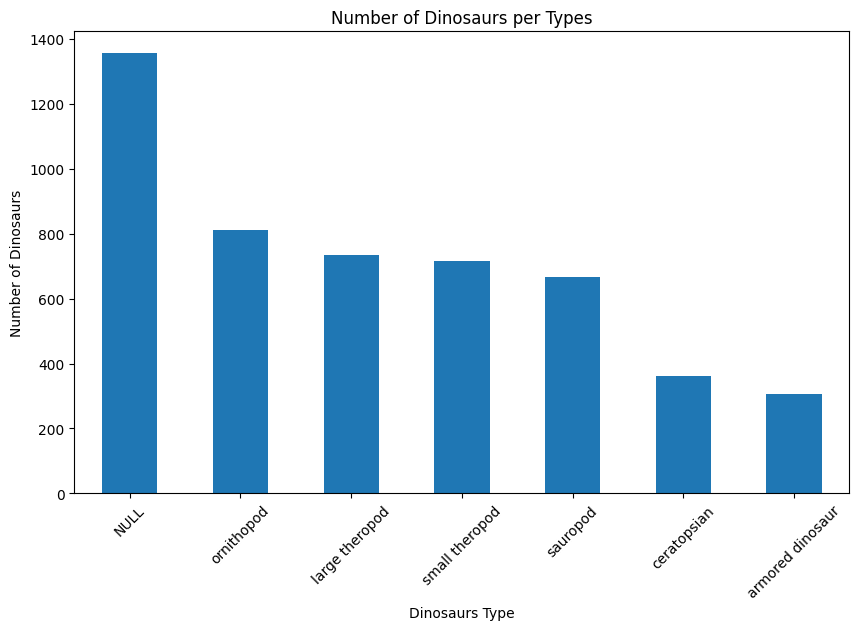

In [41]:
# Count the occurrences of each value in Column 'type'
type_counts = dinosaurs['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')

# Add titles and labels
plt.title('Number of Dinosaurs per Types')
plt.xlabel('Dinosaurs Type')
plt.ylabel('Number of Dinosaurs')
plt.xticks(rotation=45)
# Display the bar chart
plt.show()

### 4.4. Dinosaurs' Size Trend


**The data does not necessarily show a consistent grow of dinosaurs' length over time. Ther are fewer fossils that were found from dinosaurs of 200 to 300 million years age and although the records of those fossils all have lower than 15 meters length, this cannot demonstrate an increase in size of dinosaurs over time. Because there are numerous fossils found from dinosaurs of less than 75 million years age that are shorter than 5 meters.**

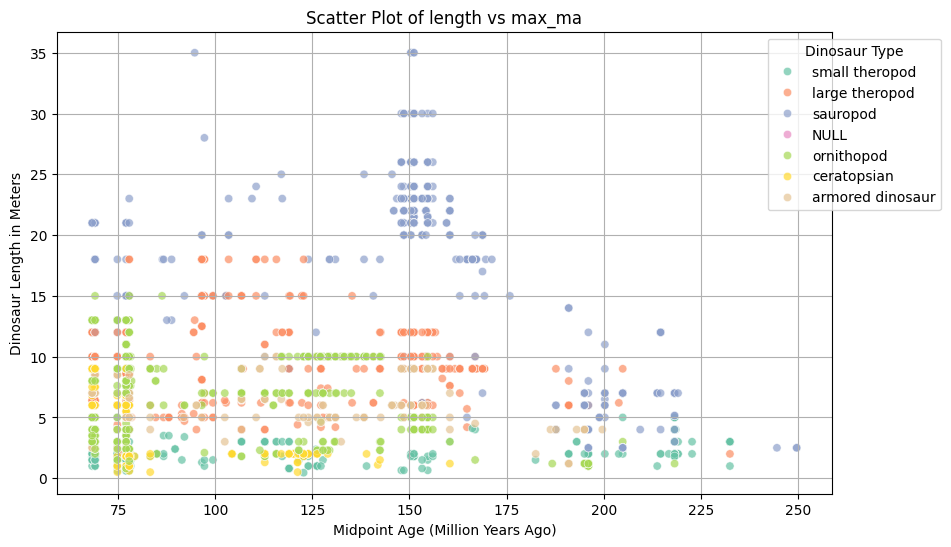

In [42]:
import matplotlib.pyplot as plt

dinosaurs ['mid_ma'] = (dinosaurs ['max_ma']+ dinosaurs ['min_ma'])/2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mid_ma', y='length_m', hue='type', data=dinosaurs, palette='Set2', alpha=0.7)

# Add titles and labels
plt.title('Scatter Plot of length vs max_ma')
plt.xlabel('Midpoint Age (Million Years Ago)')
plt.ylabel('Dinosaur Length in Meters')
plt.grid(True)

plt.legend(title="Dinosaur Type", loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the scatter plot
plt.show()

### 4.5. Interactive map showing each record


In [43]:
m = folium.Map(location=[dinosaurs['lat'].mean(), dinosaurs['lng'].mean()], zoom_start=1)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in dinosaurs.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Record {row['occurrence_no']}\nName: {row['name']}\nRegion:{row['region']}", 
    ).add_to(marker_cluster)

# Display the map in a Jupyter notebook
m # Remove the first # sign to see the map

**Note:** The interactive map won't display on GitHub. Here is the static view of the map:

![Map](./map.jpg)

### 4.6. **Other insights from analysis** 
#### 1. The median length of dinosaur records is 6.7 meters and most of the records found are shorter than 10 meters long.

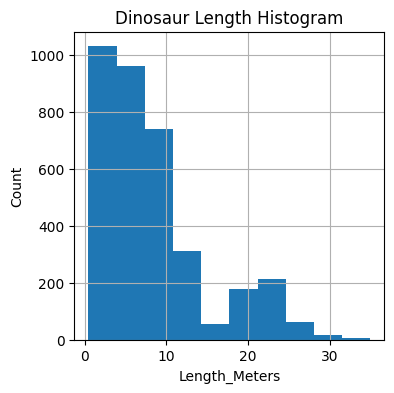

In [39]:
dinosaurs['length_m'].hist(figsize=(4, 4))
plt.title('Dinosaur Length Histogram')
plt.xlabel('Length_Meters')
plt.ylabel('Count')
plt.grid(True)

#### 2. The oldest fossil record belongs to ~252 million years ago and the youngest belongs to ~66 million years ago.

<Axes: >

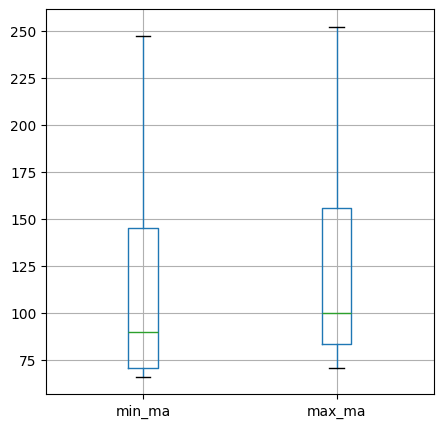

In [40]:
columns_to_include = ['min_ma','max_ma']
dinosaurs[columns_to_include].boxplot(figsize=(5, 5))

#### 3. The diet of most of the dinosaurs in this table is herbivorous


In [41]:
print(dinosaurs['diet'].unique())
print(dinosaurs['diet'].value_counts())

['omnivorous' 'carnivorous' 'herbivorous' 'NULL']
diet
herbivorous    2076
NULL           1355
carnivorous    1308
omnivorous      212
Name: count, dtype: int64


#### 4. The plot below shows how the type of the dinasour is related with it's size. Sauropod as mentioned before is the type with largest body. And Small Theropods have the smallest body.


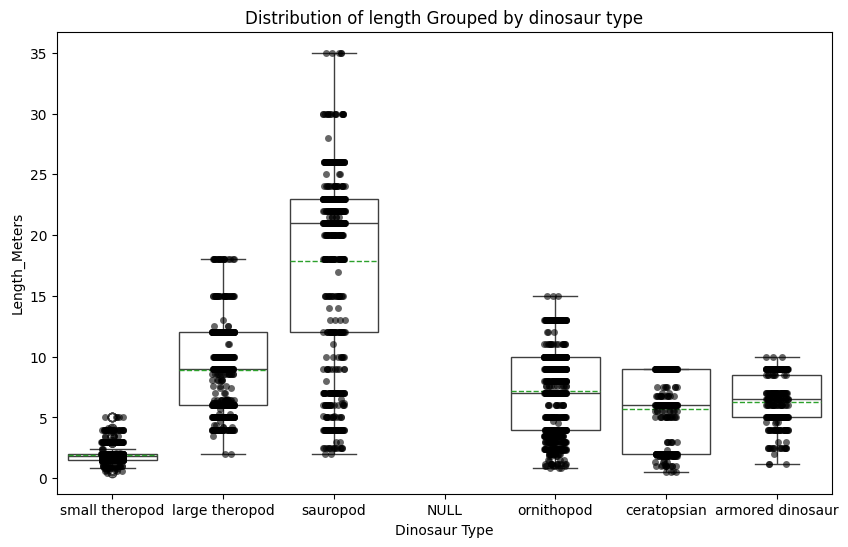

In [42]:
import seaborn as sns
# Initialize the figure
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='type', y='length_m', data= dinosaurs, showmeans=True, meanline=True,
            boxprops={'facecolor':'None'})  # Add mean line and show mean

# Overlay a stripplot to show all data points
sns.stripplot(x='type', y='length_m', data=dinosaurs, jitter=True, color='black', alpha=0.6)

# Add a title and labels
plt.title('Distribution of length Grouped by dinosaur type')
plt.xlabel('Dinosaur Type')
plt.ylabel('Length_Meters')

# Show the plot
plt.show()